In [ ]:
# Hamiltonian Eigenvalues

In [1]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

$V(x) = -V_0 e^{-\alpha x^2}$

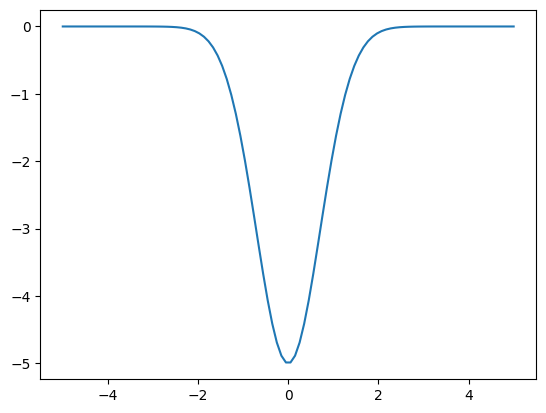

In [74]:
# declarations
n = 100
L = 5
V_0 = -5
alpha = 1
x = np.linspace(-L, L, n)
dx = (2*L)/n
V = np.zeros(n)
h = np.zeros((n, n))

# functions
def potential(x):
    return V_0*(np.e**(-alpha*(x**2)))


# plot potential
for i in range(0, n):
    V[i] = potential(x[i])

plt.plot(x, V)
plt.show()

[[-1.09737629e-06 -2.27371061e-06 -3.61364214e-06 ... -3.61364214e-06
  -2.27371061e-06 -1.09737629e-06]
 [ 1.29875440e-04  2.63000879e-04  4.02707642e-04 ... -4.02707642e-04
  -2.63000879e-04 -1.29875440e-04]
 [ 4.67722229e-03  9.35471271e-03  1.40327394e-02 ...  1.40327394e-02
   9.35471271e-03  4.67722229e-03]
 ...
 [ 4.08863562e-02  7.84794001e-02  1.09751089e-01 ... -1.09751089e-01
  -7.84794001e-02 -4.08863562e-02]
 [-1.07102179e-01 -1.39805608e-01 -7.53927818e-02 ...  7.53927818e-02
   1.39805608e-01  1.07102179e-01]
 [-1.28207194e-01 -1.06749248e-01  3.93244903e-02 ...  3.93244903e-02
  -1.06749248e-01 -1.28207194e-01]]
Lowest 5 Eigenvalues:
[-3.597582036404873, -1.2511981892605217, -0.00286625192872413, 0.29449969885352084, 0.5878413846866425]


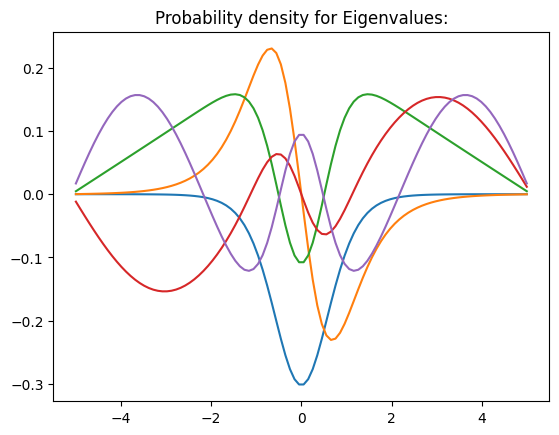

First 3 Eigenvectors:
[[-1.09737629e-06  1.29875440e-04  4.67722229e-03 -1.17899971e-02
   1.70010470e-02  2.20978883e-02  2.72064188e-02 -3.17528566e-02
   6.98665454e-02 -3.64586638e-02  4.95751446e-02 -5.37865674e-02
  -5.79228728e-02  6.59623997e-02  6.19804100e-02  4.52831512e-02
  -7.36919190e-02 -8.81629158e-02  8.46744426e-02  8.10981306e-02
   9.15609564e-02  9.48659226e-02 -9.80751592e-02 -1.01186020e-01
  -1.15174759e-01  1.12594035e-01 -1.09902381e-01  1.17642253e-01
   1.19994304e-01  1.22228794e-01  1.04195885e-01 -1.24343700e-01
   1.26337104e-01  1.29952265e-01 -1.31570727e-01  1.20823205e-02
  -1.20959145e-02  2.26568795e-02  2.25582782e-02  1.33061104e-01
  -1.34422038e-01 -1.35652292e-01 -1.36750749e-01  3.05910276e-02
  -3.12614335e-02 -1.37716416e-01 -1.38548426e-01  3.84051830e-02
  -4.54162512e-02  1.40235735e-01  1.39808634e-01 -3.50810692e-02
  -4.72667812e-02 -5.28044668e-02  5.62430253e-02 -1.40526982e-01
  -6.05084478e-02 -1.40682151e-01  6.42875392e-02  1.4

In [76]:
# generate matrix
for i in range(0, n):
    #h[i][i] = (1/(2*(dx**2)))+V[i]
    h[i][i] = (1/(dx**2))+V[i]
    if i != n-1:
        h[i][i+1] = -1/(2*(dx**2))
    if i != 0:
        h[i][i-1] = -1/(2*(dx**2))

# find eigenvalues and eigenvectors
h_eig = np.linalg.eig(h)

h_eig_sorted = sorted(h_eig[0])
psi = np.transpose(h_eig[1])
print(psi)
# display some results
print("Lowest 5 Eigenvalues:")
print(h_eig_sorted[0:5])

plt.title("Probability density for Eigenvalues:")
n_mesh = np.linspace(-L, L, n)
for i in range(5):
    plt.plot(n_mesh, psi[i])
plt.show()

print("First 3 Eigenvectors:")
print(h_eig[1][0:3])

In [16]:
# prof Varga

import numpy as np

import matplotlib.pyplot as plt
import scipy.linalg as scl
hbar=1
m=1
N = 512
a = 1.0
x = np.linspace(-a/2.,a/2.,N)
# We want to store step size, this is the reliable way:
h = x[1]-x[0] # Should be equal to a/(N-1)
V = 0.*x
Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V)
E,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT)   # We take the transpose of psiT to the wavefunction vectors can accessed as psi[n]

print(sorted(E))

[4.896383914113177, 19.58535202828455, 44.06635346515186, 78.33847011869052, 122.4004166886703, 176.25054072885834, 239.88682270898997, 313.3068760905069, 396.5079474160589, 489.4869164127669, 592.2402961092408, 704.7642329663514, 827.0545070217494, 959.1065320481241, 1100.9153557252014, 1252.4756598254685, 1413.7817604136246, 1584.8276080597402, 1765.6067880661315, 1956.1125207079272, 2156.337661487329, 2366.2747014015495, 2585.915767224419, 2815.252621801658, 3054.2766643597856, 3302.9789308286827, 3561.3500941777615, 3829.3804647657585, 4107.059990704125, 4394.378258233996, 4691.324492116743, 4997.88755603806, 5314.0559530256405, 5639.817825880294, 5975.16095762067, 6320.07277194141, 6674.540333684793, 7038.550349325845, 7412.089167470883, 7795.142779369475, 8187.696819439816, 8589.73656580747, 9001.246940857487, 9422.212511799846, 9852.617491248244, 10292.445737812153, 10741.680756702173, 11200.305700348636, 11668.30336903342, 12145.656211535017, 12632.346325786722, 13128.355459548